<a href="https://colab.research.google.com/github/AndrzejOlejniczak/PORTFOLIO/blob/main/SkimLit_model_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Part THREE of the project*

## 1. Get the data

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 7.16 MiB/s, done.
Updating files: 100% (13/13), done.


In [ ]:
# Setup data dir
data_dir = '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign'

In [ ]:
# Create filenames
import os
filepaths = [data_dir + '/'+ filename for filename in os.listdir(data_dir)]

In [ ]:
filepaths

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt']

## 2. Inspect the data

### **HELPER FUNCTION**
#### **GET LINES**

In [ ]:
def get_lines(filename):
  '''
  Reads text using filename and return lines of a text as a list.
  Args:
    filename: (str) containd filepath
  Returns:
    A list of strings.
  '''
  with open(filename, 'r') as f:
    return f.readlines()

In [ ]:
train_lines = get_lines(filepaths[0])

### 2.1. Check loaded data

In [ ]:
train_lines[:17]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [ ]:
len(train_lines)

210040

**The data is labeled but it isn't split to target / text pairs. We have to invent a way to parse and order it appropriatelly.**

## 3. Prepare the data

Since we are looking for the a meaning of each sentence we can skip abstract signature lines like `'###24293578\n'` and additional spacing lines `'\n'`

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def split_lines(lines):
  train_data = []
  train_data_with_nrows = []
  last_counter = 0
  counter = 0
  for i, row in enumerate(lines):
    if row[:3] != '\n':
      if row[:3] != '###':
        target, text = row.split('\t')[0], row.split('\t')[1].strip('\n')
        train_data.append([counter, target, text])
        counter+=1
      else:
        abstract_symbol = row.strip('\n')
        if i != 0:
          counter=0
    else:
      for el in train_data[-counter:]:
        train_data_with_nrows.append(el + [counter] + [abstract_symbol])
  return train_data_with_nrows

In [ ]:
%%time
train_data = split_lines(get_lines('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt'))
test_data = split_lines(get_lines('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt'))
val_data = split_lines(get_lines('/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt'))

CPU times: user 1.35 s, sys: 86.5 ms, total: 1.43 s
Wall time: 1.44 s


### Create DataFrames for train, test and validation data

In [ ]:
train_data_df = pd.DataFrame(train_data, columns = ['row', 'target', 'text', 'nrows', 'abstract'])
train_data_df.head(25), len(train_data_df)

(    row       target                                               text  \
 0     0    OBJECTIVE  To investigate the efficacy of @ weeks of dail...   
 1     1      METHODS  A total of @ patients with primary knee OA wer...   
 2     2      METHODS  Outcome measures included pain reduction and i...   
 3     3      METHODS  Pain was assessed using the visual analog pain...   
 4     4      METHODS  Secondary outcome measures included the Wester...   
 5     5      METHODS  Serum levels of interleukin @ ( IL-@ ) , IL-@ ...   
 6     6      RESULTS  There was a clinically relevant reduction in t...   
 7     7      RESULTS  The mean difference between treatment arms ( @...   
 8     8      RESULTS  Further , there was a clinically relevant redu...   
 9     9      RESULTS  These differences remained significant at @ we...   
 10   10      RESULTS  The Outcome Measures in Rheumatology Clinical ...   
 11   11  CONCLUSIONS  Low-dose oral prednisolone had both a short-te...   
 12    0   B

In [ ]:
test_data_df = pd.DataFrame(test_data, columns = ['row', 'target', 'text', 'nrows', 'abstract'])
test_data_df.head(25), len(test_data_df)

(    row       target                                               text  \
 0     0   BACKGROUND  This study analyzed liver function abnormaliti...   
 1     1      RESULTS  A post hoc analysis was conducted with the use...   
 2     2      RESULTS  Liver function tests ( LFTs ) were measured at...   
 3     3      RESULTS  Survival analyses were used to assess the asso...   
 4     4      RESULTS  The percentage of patients with abnormal LFTs ...   
 5     5      RESULTS  When mean hemodynamic profiles were compared i...   
 6     6      RESULTS  Multivariable analyses revealed that patients ...   
 7     7  CONCLUSIONS  Abnormal LFTs are common in the ADHF populatio...   
 8     8  CONCLUSIONS  Elevated MELD-XI scores are associated with po...   
 9     0   BACKGROUND  Minimally invasive endovascular aneurysm repai...   
 10    1   BACKGROUND  The aim of this study was to analyse the cost-...   
 11    2      METHODS  Resource use was determined from the Amsterdam...   
 12    3    

In [ ]:
val_data_df = pd.DataFrame(val_data, columns = ['row', 'target', 'text', 'nrows', 'abstract'])
val_data_df.head(25), len(val_data_df)

(    row       target                                               text  \
 0     0   BACKGROUND  IgE sensitization to Aspergillus fumigatus and...   
 1     1   BACKGROUND  It is not clear whether these patients would b...   
 2     2    OBJECTIVE  We sought to determine whether a @-month cours...   
 3     3      METHODS  Asthmatic patients who were IgE sensitized to ...   
 4     4      METHODS  Primary outcomes were improvement in quality o...   
 5     5      RESULTS              Sixty-five patients were randomized .   
 6     6      RESULTS  Fifty-nine patients started treatment ( @ rece...   
 7     7      RESULTS  Fifty-six patients took the full @ months of m...   
 8     8      RESULTS  Between the voriconazole and placebo groups , ...   
 9     9  CONCLUSIONS  We were unable to show a beneficial effect of ...   
 10    0   BACKGROUND  Opioid antagonists ( e.g. , naltrexone ) and p...   
 11    1   BACKGROUND  The use of higher doses to achieve greater eff...   
 12    2   B

In [ ]:
list_of_datasets = [train_data_df, test_data_df, val_data_df]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1. Create lists of strings for feature vectors

In [ ]:
# Create lists with txt data:
train_txt = train_data_df.text.str.lower().to_list()
test_txt = test_data_df.text.str.lower().to_list()
val_txt = val_data_df.text.str.lower().to_list()

len(train_txt), len(test_txt), len(val_txt)

(180040, 30135, 30212)

In [ ]:
train_txt[:7]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

### 3.2. Create one-hot labels


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
# Instantiate the encoder
one_hot_encoder = OneHotEncoder(sparse=False)

In [ ]:
train_labels_onehot = one_hot_encoder.fit_transform(train_data_df.target.to_numpy().reshape(-1,1))

In [ ]:
train_labels_onehot.shape[1] == train_data_df.target.nunique(), train_labels_onehot.shape[0] == len(train_data_df.target)

(True, True)

In [ ]:
test_labels_onehot = one_hot_encoder.transform(test_data_df.target.to_numpy().reshape(-1,1))
val_labels_onehot  = one_hot_encoder.transform(val_data_df.target.to_numpy().reshape(-1,1))

In [ ]:
test_labels_onehot

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [ ]:
one_hot_encoder.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_BACKGROUND', 'x0_CONCLUSIONS', 'x0_METHODS', 'x0_OBJECTIVE',
       'x0_RESULTS'], dtype=object)

### 3.3. Create numeric labels
Which will be used for Multinomial Naive Bayes baseline model (model_0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
train_labels_encoded = label_encoder.fit_transform(train_data_df.target.to_numpy())
test_labels_encoded = label_encoder.transform(test_data_df.target.to_numpy())
val_labels_encoded = label_encoder.transform(val_data_df.target.to_numpy())

In [ ]:
len(train_labels_encoded) == len(train_data_df.target)

True

In [ ]:
label_encoder.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

### 3.4. Create text vectorization layer

In [ ]:
# Import modules
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Embedding

In [ ]:
# Instantiate TextVectorization layer
text_vectorization = TextVectorization(
    max_tokens = 10000,
    standardize = 'lower_and_strip_punctuation',
    split='whitespace',
    ngrams=3,
    output_mode='int',
    output_sequence_length=27,
    pad_to_max_tokens=True,
)

In [ ]:
# Adapt the vectorizer to train_data
text_vectorization.adapt(train_txt)

In [ ]:
text_vectorization([train_data_df.text[0]])

<tf.Tensor: shape=(1, 27), dtype=int64, numpy=
array([[   6,  473,    2,   88,    4,   56,    4,  194, 2045,  279, 5668,
           5,  872,   68, 3095,    3, 1106,    1, 1047,    5,    2, 1078,
        2058,    3,  218,    2,   77]])>

In [ ]:
# Check tokenization with TextVectorizer vocabulary
for token in text_vectorization([train_data_df.text[0]])[0].numpy():
  print(f'Token: {token}, word: {text_vectorization.get_vocabulary()[token]}')

Token: 6, word: to
Token: 473, word: investigate
Token: 2, word: the
Token: 88, word: efficacy
Token: 4, word: of
Token: 56, word: weeks
Token: 4, word: of
Token: 194, word: daily
Token: 2045, word: lowdose
Token: 279, word: oral
Token: 5668, word: prednisolone
Token: 5, word: in
Token: 872, word: improving
Token: 68, word: pain
Token: 3095, word: mobility
Token: 3, word: and
Token: 1106, word: systemic
Token: 1, word: [UNK]
Token: 1047, word: inflammation
Token: 5, word: in
Token: 2, word: the
Token: 1078, word: short
Token: 2058, word: term
Token: 3, word: and
Token: 218, word: whether
Token: 2, word: the
Token: 77, word: effect


### 3.5. Prepare data pipelines

In [ ]:
# Create datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_txt, train_labels_onehot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_txt, test_labels_onehot))
val_dataset = tf.data.Dataset.from_tensor_slices((val_txt, val_labels_onehot))

In [ ]:
# Batch the datasets and turn them to prefetch datasets
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

### 3.6. Download Universal Sequence Encoder layer for word token embedding

In [ ]:
# Download TFHub USE
import tensorflow_hub as hub
USE_embedding = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', trainable=False)

## 4. Create character embedding and vectorization

In [ ]:
# Make function to split sentences into characters
def split_chars(text):
  return ' '.join(list(text))

In [ ]:
split_chars(train_txt[0])

't o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'

In [ ]:
# Split sequence-level data into character-level data
train_chars = [split_chars(sentence) for sentence in train_txt]

In [ ]:
train_chars[:2]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .']

In [ ]:
val_chars = [split_chars(sentence) for sentence in val_txt]
test_chars = [split_chars(sentence) for sentence in test_txt]

### 4.1. Check the stats for character-wise lenght of the sequences

In [ ]:
train_data_len_characters = [len(characters.split(" ")) for characters in train_chars]
test_data_len_characters = [len(characters.split(" ")) for characters in test_chars]
val_data_len_characters = [len(characters.split(" ")) for characters in val_chars]

In [ ]:
train_data_len_characters_mean = np.mean(train_data_len_characters)
test_data_len_characters_mean = np.mean(test_data_len_characters)
val_data_len_characters_mean = np.mean(val_data_len_characters)

In [ ]:
train_data_len_characters_mean, test_data_len_characters_mean, val_data_len_characters_mean

(174.70452677182848, 173.63842707814834, 174.6135641466967)

**Looks like our magic number 175**

In [ ]:
MAGIC_NUMBER = 175

In [ ]:
len_characters = [train_data_len_characters, test_data_len_characters, val_data_len_characters]

In [ ]:
len(np.unique(len_characters[0]))

802

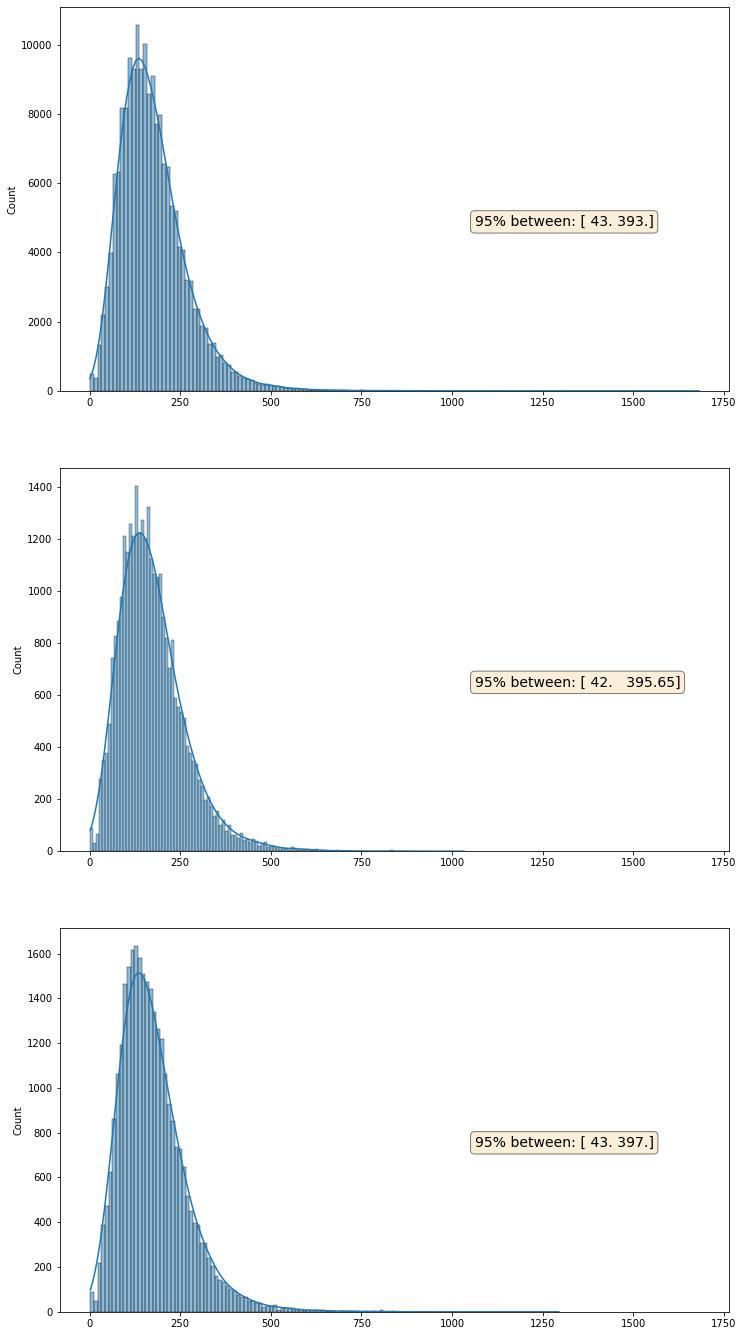

In [ ]:
fig = plt.figure(figsize=(12, 24))
ax1 = plt.subplot(311)
ax2 = plt.subplot(312, sharex=ax1)
ax3 = plt.subplot(313, sharex=ax1)
axes = [ax1, ax2, ax3]
for it, dataset in enumerate(len_characters):
  sns.histplot(dataset, bins=int(len(np.unique(len_characters[it]))/5), ax=axes[it], kde=True, kde_kws={'bw_adjust':2.2} )
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
  axes[it].text(0.05, 0.95, f'95% between: {np.quantile(len_characters[it], [0.025, 0.975])}', transform=axes[it].transAxes, fontsize=14, position=(0.62,0.43), bbox=props)
plt.show()

## Create character-level datasets

In [ ]:
import tensorflow as tf

In [ ]:
np.array(val_chars).shape, val_labels_onehot.shape

((30212,), (30212, 5))

In [ ]:
train_chars_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_chars_dataset= tf.data.Dataset.from_tensor_slices((test_chars, test_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_chars_dataset= tf.data.Dataset.from_tensor_slices((val_chars, val_labels_onehot)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_chars_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## 5. Create character-lever vectorizer

In [ ]:
import string

In [ ]:
# Get all keybord characters
alphabet = string.ascii_lowercase + string.digits

alphabet

'abcdefghijklmnopqrstuvwxyz0123456789'

In [ ]:
# Setup parameters
NUM_CHAR_TOKENS = len(alphabet) + 2 # add space and OOV token
NUM_CHAR_TOKENS

38

In [ ]:
# Instantiate vectorizer
char_vectorizer = TextVectorization(
    max_tokens=NUM_CHAR_TOKENS,
    output_sequence_length = MAGIC_NUMBER,
    standardize = 'lower_and_strip_punctuation',
    name = 'char_vectorizer'
)

In [ ]:
# Adapt character vectorizer to training data
char_vectorizer.adapt(train_chars)

In [ ]:
# Check vocab stats
char_vocab = char_vectorizer.get_vocabulary()

In [ ]:
len(char_vocab)

28

In [ ]:
print(char_vectorizer(train_chars[17]))

tf.Tensor(
[ 5  3  3  2  6  3  4  7  6  5 12 22  4  5  9  2  9 17  7  8 13  4 18 13
 11  5 12  7  8  4 11 17  7  7 10  9 20  2  8  2 15  2  5  9 16  8  2 10
 22 19  2 19  2  3  8  5 11 23  4  6 18 10 16  8  4  6 18  5 21  4  9 16
  5 12 14  8  7 22  2  3  5  9 23 20  4  3 13 14  4 11  3  7  8  4  5 12
 17  7  7 10  5  6 10  6  2 16  3  8  5 12  9  3  4 15 16 12  4  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0], shape=(175,), dtype=int64)


### 5.1. Create Embedding layer

In [ ]:
# Create an embedding layer for model_1
embedding_char = Embedding(input_dim=len(char_vocab),
                      output_dim=25, # number assumed in the paper
                      mask_zero=True,
                      name='char_embed')

## 6. Create positional data

Let's check the distribution of row counts and the fistribution of lenghts of the abstracts

In [ ]:
train_nrows = train_data_df.nrows.value_counts()
test_nrows = test_data_df.nrows.value_counts()
val_nrows = val_data_df.nrows.value_counts()

In [ ]:
list_of_dfs = [train_data_df, test_data_df, val_data_df]

In [ ]:
val_data_df.nrows.value_counts()

12    4284
11    3751
13    3744
10    3330
14    3066
15    2565
9     1935
16    1920
17    1547
8     1096
18     666
7      539
19     475
20     460
21     189
22     176
6      162
25      75
23      69
27      54
26      52
5       45
4       12
Name: nrows, dtype: int64

In [ ]:
val_data_df.row.value_counts()

0     2500
1     2500
2     2500
3     2500
4     2497
5     2488
6     2461
7     2384
8     2247
9     2032
10    1699
11    1358
12    1001
13     713
14     494
15     323
16     203
17     112
18      75
19      50
20      27
21      18
22      10
23       7
24       7
25       4
26       2
Name: row, dtype: int64

In [ ]:
all_the_row_counts = [train_nrows, test_nrows, val_nrows]
all_the_data_names = ['Train data', 'Test data', 'Validation data']

In [ ]:
len(val_data_df.abstract.unique())

2500

In [ ]:
sum(val_data_df.nrows)

388586

In [ ]:
pd.DataFrame(train_nrows).reset_index()['index'][ pd.DataFrame(train_nrows).reset_index().nrows ==max(pd.DataFrame(train_nrows).reset_index().nrows)]

0    12
Name: index, dtype: int64

In [ ]:
from matplotlib import ticker

In [ ]:
pd.__version__

'1.3.5'

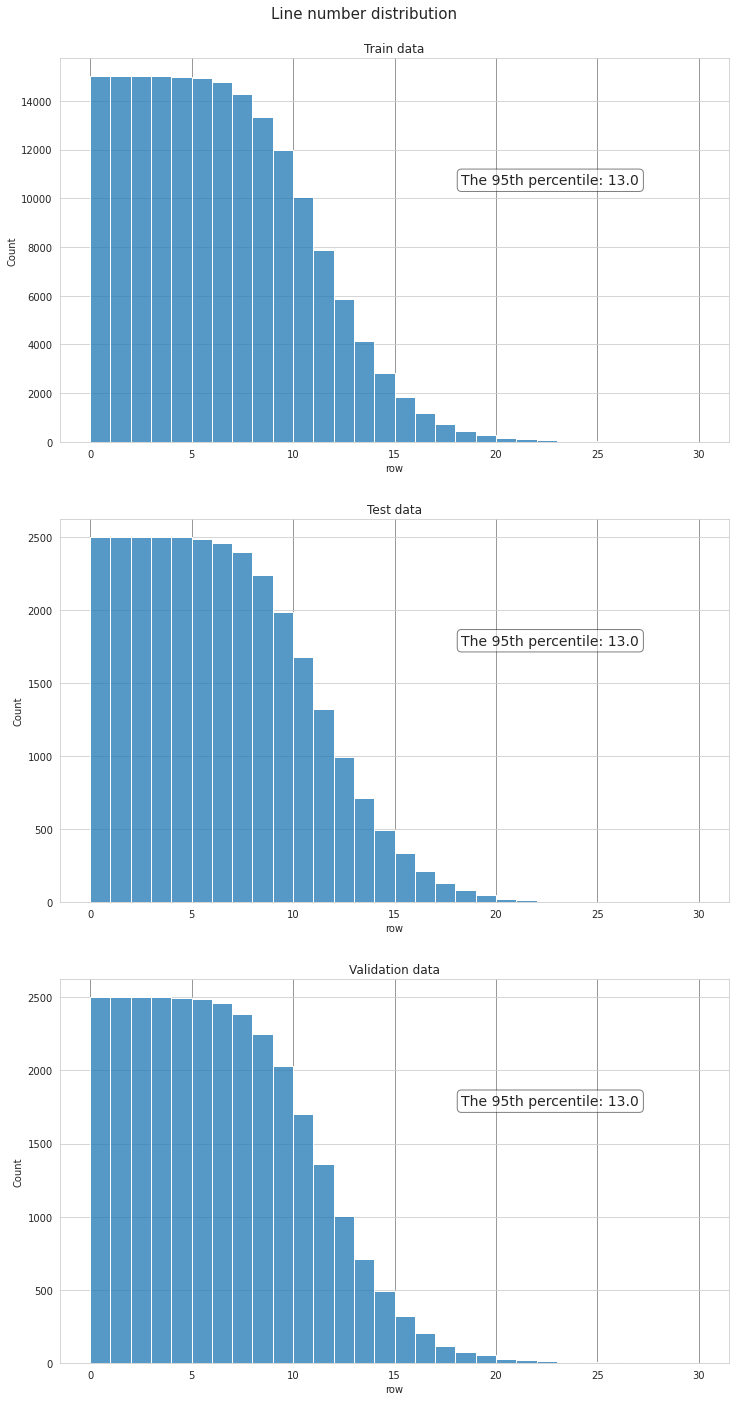

In [ ]:
fig = plt.figure(figsize=(12, 24))
sns.set_style('whitegrid')
plt.suptitle('Line number distribution',  x=0.37, y=0.91, horizontalalignment='left', verticalalignment='top', fontsize = 15)
ax1 = plt.subplot(311)
ax2 = plt.subplot(312, sharex=ax1)
ax3 = plt.subplot(313, sharex=ax1)
axes = [ax1, ax2, ax3]
for it, dataset in enumerate(list_of_dfs):
  axes[it].grid(visible=True, which='major', axis='x', linestyle='-', color='gray')
  axes[it].grid(visible=True, which='minor', axis='x', linestyle='--', color='gray')
  sns.histplot( x='row',ax=axes[it], data=dataset.reset_index(), bins=range(len(dataset['row'].value_counts())))
  axes[it].text(x=.6, y=.7, s=f'The 95th percentile: {np.percentile(dataset.row, 95)}',  transform=axes[it].transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.5))
  axes[it].set_title(all_the_data_names[it])
plt.show()

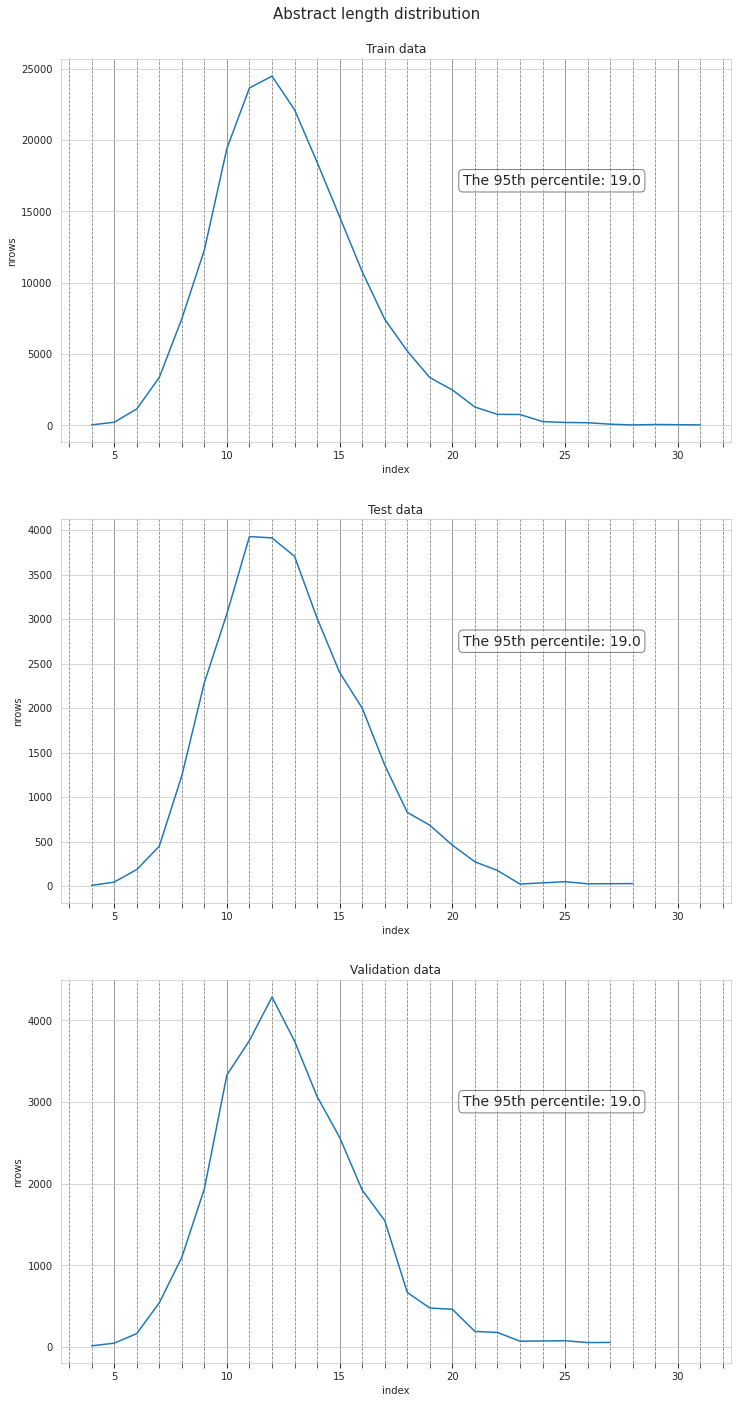

In [ ]:
fig = plt.figure(figsize=(12, 24))
sns.set_style('whitegrid')
plt.suptitle('Abstract length distribution',  x=0.37, y=0.91, horizontalalignment='left', verticalalignment='top', fontsize = 15)
ax1 = plt.subplot(311)
ax2 = plt.subplot(312, sharex=ax1)
ax3 = plt.subplot(313, sharex=ax1)
axes = [ax1, ax2, ax3]
for it, dataset in enumerate(all_the_row_counts):
  axes[it].grid(visible=True, which='major', axis='x', linestyle='-', color='gray')
  axes[it].grid(visible=True, which='minor', axis='x', linestyle='--', color='gray')
  axes[it].xaxis.set_major_locator(ticker.MultipleLocator(5))
  axes[it].xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
  axes[it].xaxis.set_ticks_position('bottom')
  axes[it].tick_params(which='major', width=1.00, length=5)
  axes[it].tick_params(which='minor', width=0.75, length=5)
  sns.lineplot(x='index', y='nrows',ax=axes[it], data=pd.DataFrame(dataset).reset_index())
  axes[it].text(x=.6, y=.7, s=f'The 95th percentile: {np.percentile(list_of_dfs[it].nrows, 95)}',  transform=axes[it].transAxes, fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.5))
  axes[it].set_title(all_the_data_names[it])
plt.show()

### 6.1 One-hot encode the order of the text lines

In [ ]:
# Use Tensorflow to create one-hot encoded tensors
train_line_number_onehot = tf.one_hot(train_data_df['row'].to_numpy(), depth=15)
train_line_number_onehot[:5], train_line_number_onehot.shape

(<tf.Tensor: shape=(5, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>, TensorShape([180040, 15]))

In [ ]:
test_line_number_onehot = tf.one_hot(test_data_df['row'].to_numpy(), depth=15)
test_line_number_onehot[:5], test_line_number_onehot.shape

(<tf.Tensor: shape=(5, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>, TensorShape([30135, 15]))

In [ ]:
val_line_number_onehot = tf.one_hot(val_data_df['row'].to_numpy(), depth=15)
val_line_number_onehot[:5], val_line_number_onehot.shape

(<tf.Tensor: shape=(5, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32)>, TensorShape([30212, 15]))

**Any engineered features used to train the model need to be available at test time or in the wild (after MLOps production).**

### 6.2. One-hot encode the number of lines in each abstract

In [ ]:
train_data_df.head(13)

,row,target,text,nrows,abstract
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,12,###24293578
1,1,METHODS,A total of @ patients with primary knee OA wer...,12,###24293578
2,2,METHODS,Outcome measures included pain reduction and i...,12,###24293578
3,3,METHODS,Pain was assessed using the visual analog pain...,12,###24293578
4,4,METHODS,Secondary outcome measures included the Wester...,12,###24293578
5,5,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ...",12,###24293578
6,6,RESULTS,There was a clinically relevant reduction in t...,12,###24293578
7,7,RESULTS,The mean difference between treatment arms ( @...,12,###24293578
8,8,RESULTS,"Further , there was a clinically relevant redu...",12,###24293578
9,9,RESULTS,These differences remained significant at @ we...,12,###24293578


In [ ]:
train_nrows_onehot = tf.one_hot(train_data_df['nrows'].to_numpy(), depth=20)
train_nrows_onehot[:5], train_nrows_onehot.shape

(<tf.Tensor: shape=(5, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0.]], dtype=float32)>, TensorShape([180040, 20]))

In [ ]:
test_nrows_onehot = tf.one_hot(test_data_df['nrows'].to_numpy(), depth=20)
test_nrows_onehot[:5], test_nrows_onehot.shape

(<tf.Tensor: shape=(5, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]], dtype=float32)>, TensorShape([30135, 20]))

In [ ]:
val_nrows_onehot = tf.one_hot(val_data_df['nrows'].to_numpy(), depth=20)
val_nrows_onehot[:5], val_nrows_onehot.shape

(<tf.Tensor: shape=(5, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]], dtype=float32)>, TensorShape([30212, 20]))

### 6.3. Combine all the data into datsets

#### 6.3.1. Train dataset

In [ ]:
# Create feature dataset
train_tribrid_data = tf.data.Dataset.from_tensor_slices((
    train_line_number_onehot,
    train_nrows_onehot,
    train_txt,
    train_chars,
))

# Create label dataset
train_tribrid_labels = tf.data.Dataset.from_tensor_slices(train_labels_onehot)

# Combine fetures and labels into dataset
train_tribrid_dataset = tf.data.Dataset.zip((train_tribrid_data, train_tribrid_labels))

# Batch and prefetch the dataset
train_tribrid_dataset = train_tribrid_dataset.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_tribrid_dataset.element_spec

((TensorSpec(shape=(32, 15), dtype=tf.float32, name=None),
  TensorSpec(shape=(32, 20), dtype=tf.float32, name=None),
  TensorSpec(shape=(32,), dtype=tf.string, name=None),
  TensorSpec(shape=(32,), dtype=tf.string, name=None)),
 TensorSpec(shape=(32, 5), dtype=tf.float64, name=None))

#### 6.3.2. Test dataset

In [ ]:
# Create feature dataset
test_tribrid_data = tf.data.Dataset.from_tensor_slices((
    test_line_number_onehot,
    test_nrows_onehot,
    test_txt,
    test_chars,
))

# Create label dataset
test_tribrid_labels = tf.data.Dataset.from_tensor_slices(test_labels_onehot)

# Combine fetures and labels into dataset
test_tribrid_dataset = tf.data.Dataset.zip((test_tribrid_data, test_tribrid_labels))

# Batch and prefetch the dataset
test_tribrid_dataset =test_tribrid_dataset.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [ ]:
test_tribrid_dataset.element_spec

((TensorSpec(shape=(32, 15), dtype=tf.float32, name=None),
  TensorSpec(shape=(32, 20), dtype=tf.float32, name=None),
  TensorSpec(shape=(32,), dtype=tf.string, name=None),
  TensorSpec(shape=(32,), dtype=tf.string, name=None)),
 TensorSpec(shape=(32, 5), dtype=tf.float64, name=None))

#### 6.3.3. Validation dataset

In [ ]:
# Create feature dataset
val_tribrid_data = tf.data.Dataset.from_tensor_slices((
    val_line_number_onehot,
    val_nrows_onehot,
    val_txt,
    val_chars,
))

# Create label dataset
val_tribrid_labels = tf.data.Dataset.from_tensor_slices(val_labels_onehot)

# Combine fetures and labels into dataset
val_tribrid_dataset = tf.data.Dataset.zip((val_tribrid_data, val_tribrid_labels))

# Batch and prefetch the dataset
val_tribrid_dataset = val_tribrid_dataset.batch(32, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [ ]:
val_tribrid_dataset.element_spec

((TensorSpec(shape=(32, 15), dtype=tf.float32, name=None),
  TensorSpec(shape=(32, 20), dtype=tf.float32, name=None),
  TensorSpec(shape=(32,), dtype=tf.string, name=None),
  TensorSpec(shape=(32,), dtype=tf.string, name=None)),
 TensorSpec(shape=(32, 5), dtype=tf.float64, name=None))

## 7. Build the model
1. Create word-token model.
2. Create character-token model.
3. Create a model taking in row number feature.
4. Create a model taking in abstract length feature.
5. Combine outputs of 1. and 2. using Concatenate layer.
6. Combine outputs of 3., 4. and 5. using Concatenate layer.
7. Combine all the inputs and label probability output into the final model.

### 7.1. Create word-token model

In [ ]:
from tensorflow.keras.layers import Dense, Input, LSTM, Bidirectional, MaxPooling1D, Concatenate, Dropout

In [ ]:
token_inputs = Input(shape=[], dtype='string', name='token_inputs')
token_embeddings = USE_embedding(token_inputs)
token_outputs = Dense(128, activation='relu')(token_embeddings)
token_model = tf.keras.Model(
    inputs=token_inputs,
    outputs=token_outputs,
    name='token_model'
)

In [ ]:
token_model.summary()

Model: "token_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 token_inputs (InputLayer)   [(None,)]                 0         
                                                                 
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
Total params: 256,863,488
Trainable params: 65,664
Non-trainable params: 256,797,824
_________________________________________________________________


### 7.2. Create character-token model

In [ ]:
char_inputs = Input(shape=(1,), dtype='string')
char_vectors = char_vectorizer(char_inputs)
char_embedding = embedding_char(char_vectors)
char_bi_lstm = Bidirectional(LSTM(24))(char_embedding)
char_model = tf.keras.Model(
    inputs=char_inputs,
    outputs=char_bi_lstm,
    name='character_model'
)

In [ ]:
char_model.summary()

Model: "character_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 175)              0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 175, 25)           700       
                                                                 
 bidirectional (Bidirectiona  (None, 48)               9600      
 l)                                                              
                                                                 
Total params: 10,300
Trainable params: 10,300
Non-trainable params: 0
_________________________________________________________________


### 7.3. Create row number retention model

In [ ]:
row_inputs = Input(shape=(15,), dtype=tf.float32, name='row_inputs')
row_outputs = Dense(128, activation='relu')(row_inputs)
row_model = tf.keras.Model(
    inputs=row_inputs,
    outputs=row_outputs,
    name='row_model'
)

In [ ]:
row_model.summary()

Model: "row_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 row_inputs (InputLayer)     [(None, 15)]              0         
                                                                 
 dense_1 (Dense)             (None, 128)               2048      
                                                                 
Total params: 2,048
Trainable params: 2,048
Non-trainable params: 0
_________________________________________________________________


### 7.4. Create abstract length retention model

In [ ]:
nrows_inputs = Input(shape=(20,), dtype=tf.float32, name='nrows_inputs')
nrows_outputs = Dense(32, activation='relu')(nrows_inputs)
nrows_model = tf.keras.Model(
    inputs=nrows_inputs,
    outputs=nrows_outputs,
    name='nrows_model'
)

In [ ]:
nrows_model.summary()

Model: "nrows_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 nrows_inputs (InputLayer)   [(None, 20)]              0         
                                                                 
 dense_2 (Dense)             (None, 32)                672       
                                                                 
Total params: 672
Trainable params: 672
Non-trainable params: 0
_________________________________________________________________


### 7.5. Combine character-level and word-level embeddings using Concatenate

In [ ]:
combined_embeddings = Concatenate(name='char_word_embedding')([token_model.output, char_model.output])

In [ ]:
z = Dense(256, activation='relu')(combined_embeddings)
z = Dropout(0.5)(z)

### 7.6. Combine positional data models with character-level and word-level embeddings

In [ ]:
tribrid_embeddings = Concatenate(name='tribrid_embedding')([row_model.output,
                                                            nrows_model.output,
                                                            z])

### 7.7. Create output layer

In [ ]:
output_layer = Dense(5, activation='softmax', name='output_layer')(tribrid_embeddings)

model_5 = tf.keras.Model(
    inputs=[row_model.input,
            nrows_model.input,
            token_model.input,
            char_model.input],
    outputs=output_layer,
    name='SkimLit'
)

In [ ]:
model_5.summary()

Model: "SkimLit"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 175)         0           ['input_1[0][0]']                
 tion)                                                                                            
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          256797824   ['token_inputs[0][0]']     

In [ ]:
from tensorflow.keras.utils import plot_model

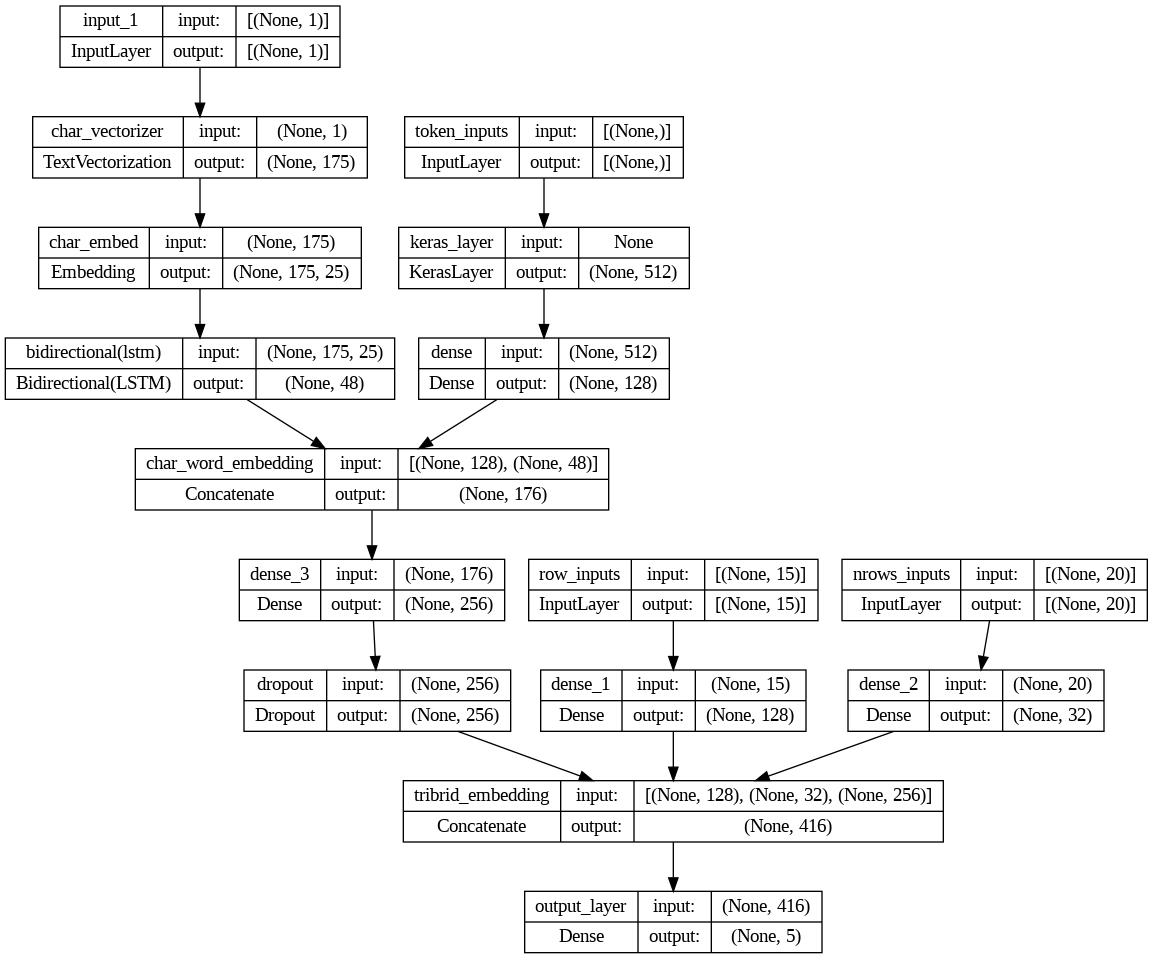

In [ ]:
plot_model(model_5, show_shapes=True)

In [ ]:
# Compile the model
model_5.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

## 8. Fit and evaluate the model

In [ ]:
len(train_tribrid_dataset)*32

180032

In [ ]:
history_5 = model_5.fit(
    train_tribrid_dataset,
    epochs=10,
    steps_per_epoch=int(0.1*len(train_tribrid_dataset)),
    validation_data=val_tribrid_dataset,
    validation_steps=int(0.1*len(val_tribrid_dataset))
)

Epoch 1/10
562/562 [==============================] - 123s 199ms/step - loss: 1.0688 - accuracy: 0.7434 - val_loss: 0.9789 - val_accuracy: 0.8065
Epoch 2/10
562/562 [==============================] - 103s 183ms/step - loss: 0.9649 - accuracy: 0.8166 - val_loss: 0.9506 - val_accuracy: 0.8291
Epoch 3/10
562/562 [==============================] - 107s 191ms/step - loss: 0.9487 - accuracy: 0.8272 - val_loss: 0.9392 - val_accuracy: 0.8344
Epoch 4/10
562/562 [==============================] - 104s 186ms/step - loss: 0.9398 - accuracy: 0.8330 - val_loss: 0.9310 - val_accuracy: 0.8351
Epoch 5/10
562/562 [==============================] - 106s 189ms/step - loss: 0.9366 - accuracy: 0.8359 - val_loss: 0.9234 - val_accuracy: 0.8434
Epoch 6/10
562/562 [==============================] - 105s 187ms/step - loss: 0.9399 - accuracy: 0.8301 - val_loss: 0.9210 - val_accuracy: 0.8411
Epoch 7/10
562/562 [==============================] - 106s 189ms/step - loss: 0.9277 - accuracy: 0.8406 - val_loss: 0.9230 -

In [ ]:
model_5_eval = model_5.evaluate(test_tribrid_dataset)

941/941 [==============================] - 42s 45ms/step - loss: 0.9151 - accuracy: 0.8453


### **HELPER FUNCTION**

In [ ]:
def plot_curves_eval(history, eval_acc=0.5, eval_loss=0.5, y_lim_loss = [0, 1], y_lim_acc=[0,1]):

    '''
    Uses seaborn and to plot curves
    as scatterplot with regression
    attrs:
    history: tf history object
    eval_acc: (float) evaluation accuracy
    eval_loss: (float) evaluation loss
    '''
    from matplotlib import ticker

    def forward(x):
        return x**(1/3)


    def inverse(x):
        return x**3

    # Create DataFrame
    df = pd.DataFrame(history.history)
    df.head()

    # Setup the figure
    plt.figure(figsize=(34, 11))
    plt.suptitle(f'Model {history.model.name} metrics', fontsize='x-large')

    # Setup loss axis
    ax1 = plt.subplot(1, 2, 1)

    # Plot grid
    ax1.grid(visible=True, which='major', axis='y', linestyle='-', color='gray')
    ax1.grid(visible=True, which='minor', axis='y', linestyle='--')

    # Setup y scale
    ax1.set_yscale('function', functions=(forward, inverse))

    # Setup ylim
    ax1.set_ylim(y_lim_loss[0], y_lim_loss[1])

    # Setup ticks and grid
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))

    ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))

    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

    ax1.tick_params(which='major', width=1.00, length=5)
    ax1.tick_params(which='minor', width=0.75, length=5)

    # Plot loss
    sns.lineplot(x='index', y='loss', data=df.reset_index(),
                label='Training Loss')
    sns.lineplot(x='index', y='val_loss', data=df.reset_index(),
                label='Validation Loss')
    plt.axhline(y=eval_loss, label='Evaluation Loss', color='black', linestyle=':', linewidth=2.5)
    plt.legend()
    plt.title('Loss Curves')

    # Setup accuracy axis
    ax2 = plt.subplot(1, 2, 2)

    # Plot grid
    ax2.grid(visible=True, which='major', axis='y', linestyle='-', color='gray')
    ax2.grid(visible=True, which='minor', axis='y', linestyle='--')

    # Setup yscale
    ax2.set_yscale('function', functions=(inverse, forward))

    # Setup ylim
    ax2.set_ylim(y_lim_acc[0], y_lim_acc[1])

    # Setup ticks
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))

    ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))

    ax2.yaxis.set_ticks_position('left')
    ax2.xaxis.set_ticks_position('bottom')

    ax2.tick_params(which='major', width=1.00, length=5)
    ax2.tick_params(which='minor', width=0.75, length=5)



    # Plot Accuracy
    sns.lineplot(x='index', y='accuracy', data=df.reset_index(),
                label='Training Accuracy')
    sns.lineplot(x='index', y='val_accuracy', data=df.reset_index(),
                label='Validation Accuracy')
    plt.axhline(y=eval_acc, label='Evaluation Accuracy', color='black', linestyle=':', linewidth=2.5)
    plt.legend()
    plt.title('Accuracy Curves')


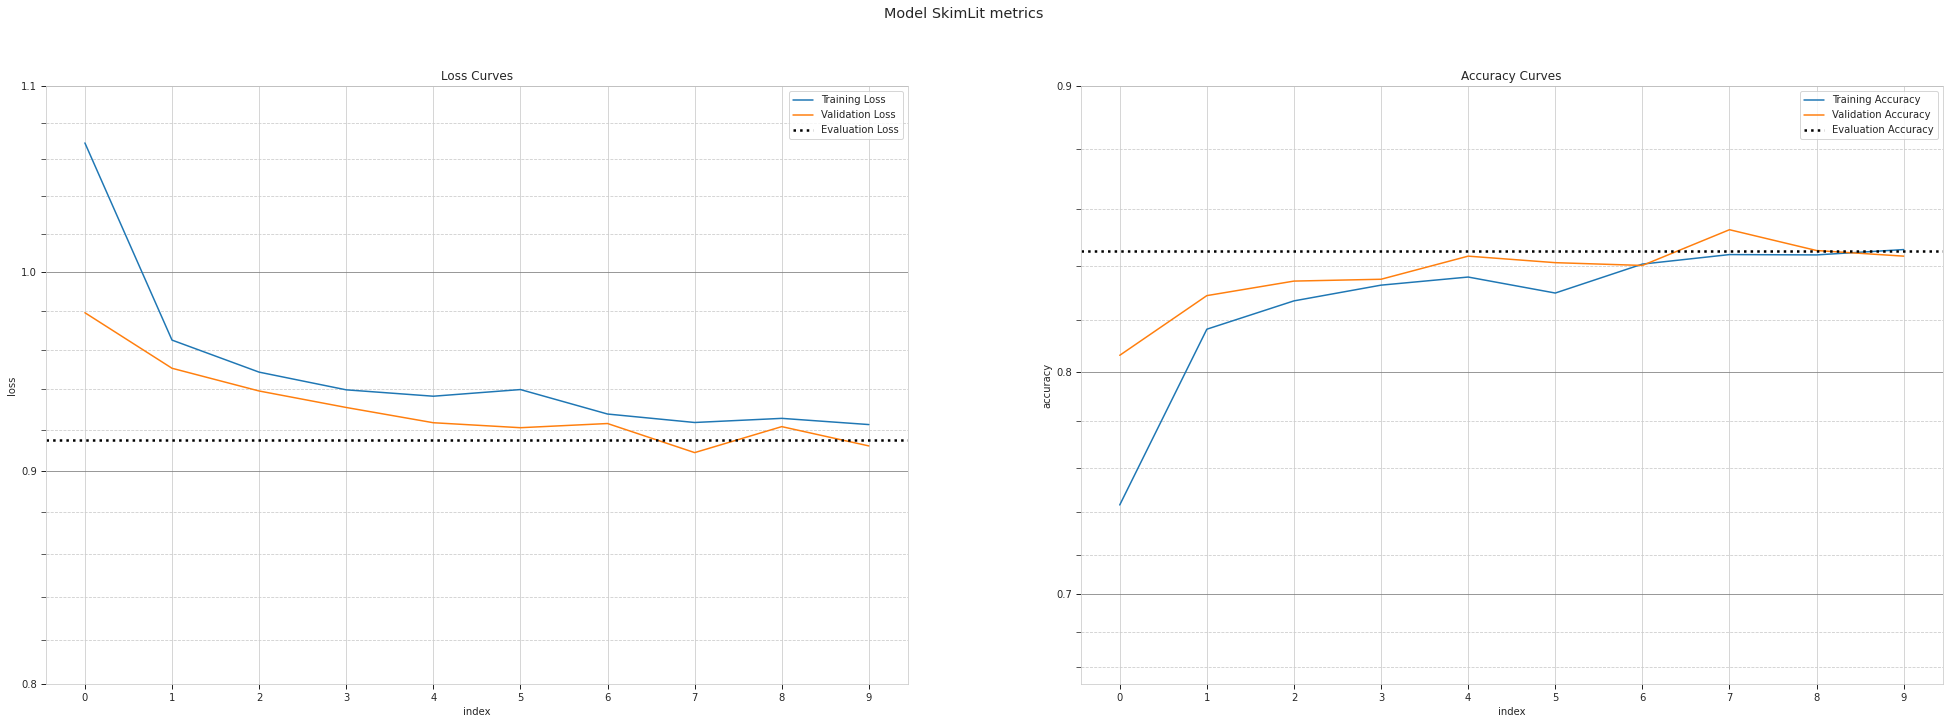

In [ ]:
plot_curves_eval(history_5, eval_acc=model_5_eval[1], eval_loss=model_5_eval[0], y_lim_loss=[0.8, 1.1], y_lim_acc=[0.65, 0.9])

### **HELPER FUNCTION**

In [ ]:
def create_crp(classification_report, class_names=None, experiment_name='Experiment', save_csv=False):

  '''
  Creates pandas DataFrame from sklearn classification_report
  attrs:
  classification_report: (dict)
  class_names: (arr of str) list of class names
  experiment_name: (str) a name that will be added
    as an upper level of the column axis multiindex
  '''

  # Create DataFrame
  df = pd.DataFrame(classification_report).transpose()
  df.rename(index={f'{k}': f'{k}_{v.lower()}' for k, v in zip(range(len(class_names)), class_names )}, inplace=True)
  if save_csv==True:
    concat_df = pd.concat({f'{experiment_name}': df}, axis=1)
    concat_df.to_csv()
  return pd.concat({f'{experiment_name}': df}, axis=1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Let's predict on a dataset batched with remainder
test_tribrid_dataset_remainder = tf.data.Dataset.zip((test_tribrid_data, test_tribrid_labels))
test_tribrid_dataset_remainder = test_tribrid_dataset_remainder.batch(32, drop_remainder=False).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_5_pred_probs = model_5.predict(test_tribrid_dataset)

941/941 [==============================] - 46s 49ms/step


In [ ]:
model_5_predictions = tf.argmax(model_5_pred_probs, axis=1)

In [ ]:
model_5_predictions[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([3, 2, 2, 2, 4])>

In [ ]:
model_5_crp = classification_report(y_true=test_labels_encoded[:30112], y_pred=model_5_predictions, output_dict=True)

In [ ]:
model_5_crp_df = create_crp(model_5_crp, class_names=label_encoder.classes_, experiment_name='Model 5: word, character, positional embeddings v1')

In [ ]:
model_5_crp_df

Model 5: word, character, positional embeddings v1            \
                                                       precision    recall   
0_background                                            0.733047  0.800719   
1_conclusions                                           0.889071  0.831473   
2_methods                                               0.874349  0.899373   
3_objective                                             0.778424  0.516724   
4_results                                               0.851593  0.892221   
accuracy                                                0.845278  0.845278   
macro avg                                               0.825297  0.788102   
weighted avg                                            0.844842  0.845278   

                                       
               f1-score       support  
0_background   0.765390   3618.000000  
1_conclusions  0.859308   4569.000000  
2_methods      0.886684   9888.000000  
3_objective    0.621134   2332.000000  
4_results      0.871434   9705.000000  
accuracy       0.845278      0.845278  
macro avg      0.800790  30112.000000  
weighted avg   0.842476  30112.000000